In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Read the CSV file
df = pd.read_csv("data/data.csv")

In [4]:
# Overview of the dataset
num_rows, num_cols = df.shape
data_types = df.dtypes


In [5]:
num_rows = df.shape[0]
num_cols = df.shape[1]
data_types = df.dtypes

output_table = pd.DataFrame({'Metric': ['Number of rows', 'Number of columns', 'Data types'],
                             'Value': [num_rows, num_cols, data_types]})
output_table.set_index('Metric', inplace=True)

output_table

,Value
Metric,
Number of rows,95662
Number of columns,16
Data types,TransactionId object BatchId ...


Extract Only Numeric Parts From Columns

In [5]:
df['TransactionId'] = df['TransactionId'].str.extract('(\d+)') # Extract only numeric part
df['BatchId'] = df['BatchId'].str.extract('(\d+)') # Extract only numeric part
df['AccountId'] = df['AccountId'].str.extract('(\d+)') # Extract only numeric part
df['SubscriptionId'] = df['SubscriptionId'].str.extract('(\d+)') # Extract only numeric part
df['CustomerId'] = df['CustomerId'].str.extract('(\d+)') # Extract only numeric part
df['ProviderId'] = df['ProviderId'].str.extract('(\d+)') # Extract only numeric part
df['ProductId'] = df['ProductId'].str.extract('(\d+)') # Extract only numeric part
df['ChannelId'] = df['ChannelId'].str.extract('(\d+)') # Extract only numeric part


In [6]:
# Get the most frequent items and their count for each column
frequent_items = {}
for column in df.columns:
    
    if column == 'PricingStrategy' or column == 'FraudResult':
        frequent_items[column] = df[column].mode().values[0]  # Calculate mode for specific columns
    elif df[column].dtype == 'float64' or df[column].dtype == 'int64':
        frequent_items[column] = df[column].mean()  # Calculate mean for numeric columns
    else:
        frequent_items[column] = df[column].mode().values[0]  # Calculate mode for non-numeric columns

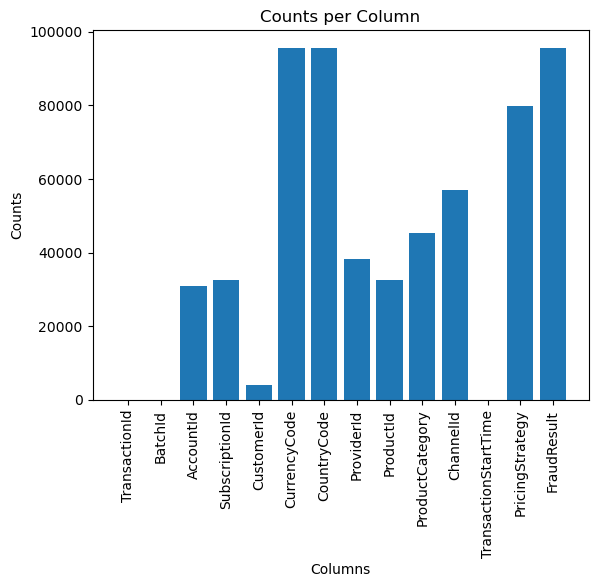

In [7]:
# Data
labels = ['TransactionId', 'BatchId', 'AccountId', 'SubscriptionId', 'CustomerId', 'CurrencyCode', 'CountryCode',
          'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'TransactionStartTime', 'PricingStrategy',
          'FraudResult']
counts = [1, 28, 30893, 32630, 4091, 95662, 95662, 38189, 32635, 45405, 56935, 17, 79848, 95469]

# Bar chart
plt.bar(labels, counts)
plt.xticks(rotation='vertical')
plt.xlabel('Columns')
plt.ylabel('Counts')
plt.title('Counts per Column')

plt.show()

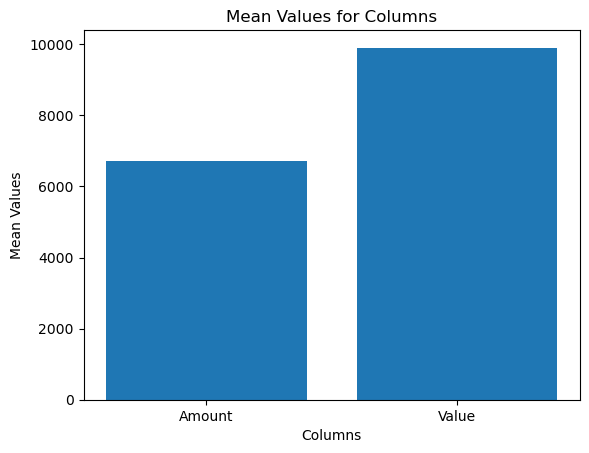

In [8]:
# Data
columns = ['Amount', 'Value']
mean_values = [frequent_items['Amount'], frequent_items['Value']]

# Bar chart
plt.bar(columns, mean_values)
plt.xlabel('Columns')
plt.ylabel('Mean Values')
plt.title('Mean Values for Columns')

plt.show()

Distribution of Numerical Features


In [11]:

# Select the numerical columns
numeric_columns = ['Amount', 'Value']

# Calculate descriptive statistics
statistics = df[numeric_columns].describe()

# Identify patterns
pattern = df[numeric_columns].corr()

# Identify skewness
skewness = df[numeric_columns].skew()

# Identify potential outliers
outliers = {}
for column in numeric_columns:
    Q1 = statistics.loc['25%', column]
    Q3 = statistics.loc['75%', column]
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    outliers[column] = column_outliers



In [12]:
# Print the results
print("Descriptive Statistics:")
print(statistics)
print("\nCorrelation Matrix:")
print(pattern)
print("\nSkewness:")
print(skewness)
print("\nPotential Outliers:")


Descriptive Statistics:
             Amount         Value
count  9.566200e+04  9.566200e+04
mean   6.717846e+03  9.900584e+03
std    1.233068e+05  1.231221e+05
min   -1.000000e+06  2.000000e+00
25%   -5.000000e+01  2.750000e+02
50%    1.000000e+03  1.000000e+03
75%    2.800000e+03  5.000000e+03
max    9.880000e+06  9.880000e+06

Correlation Matrix:
          Amount     Value
Amount  1.000000  0.989692
Value   0.989692  1.000000

Skewness:
Amount    51.098490
Value     51.291086
dtype: float64

Potential Outliers:


In [15]:
for column, column_outliers in outliers.items():
    print(f"\n{column}:")
    print(column_outliers.head(10))

# # Visualize the distribution of numerical features
# for column in numeric_columns:
#     plt.figure(figsize=(8, 6))
#     sns.histplot(df[column], kde=True)
#     plt.xlabel(column)
#     plt.ylabel('Frequency')
#     plt.title('Distribution of ' + column)
#     plt.show()


Amount:
   TransactionId BatchId AccountId SubscriptionId CustomerId CurrencyCode  \
3            380  102363       648           2185        988          UGX   
6         118063  118460      2442           1980       2858          UGX   
32          5351  110904      2540            671       2956          UGX   
39        104700   55274      2126           4362       2531          UGX   
40         13858   86043      2126           4362       2531          UGX   
41         34855   45933       826           1611       1170          UGX   
43        124368   19029      2126           4362       2531          UGX   
52         38396  110362      2744           1665       3165          UGX   
57         72438    3221      2744           1665       3165          UGX   
75         74987    1733       460           2976        790          UGX   

    CountryCode ProviderId ProductId     ProductCategory ChannelId   Amount  \
3           256          1        21        utility_bill        

Distribution of Categorical Features


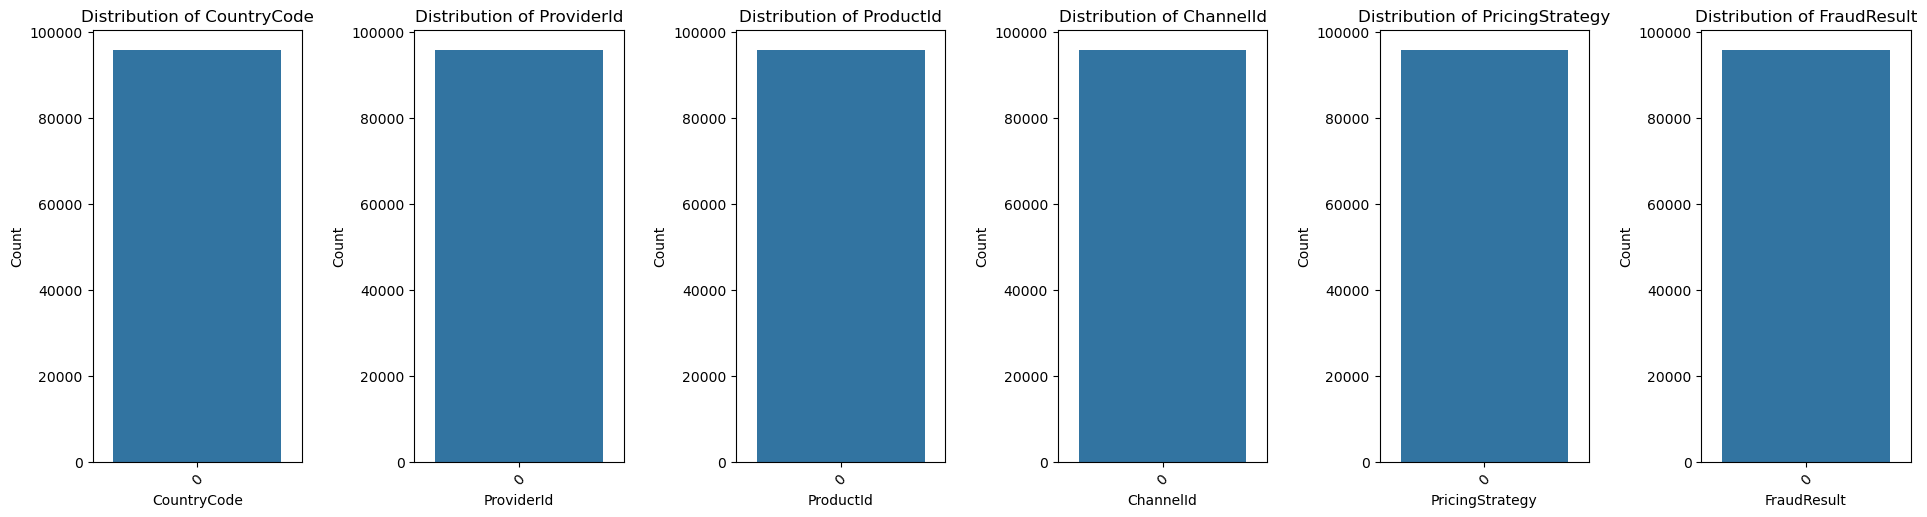

In [21]:
# Select the categorical columns
categorical_columns = [ 'CountryCode', 'ProviderId', 'ProductId', 'ChannelId', 'PricingStrategy', 'FraudResult']

# Create a single plot with subplots for each categorical column
fig, axes = plt.subplots(nrows=1, ncols=len(categorical_columns), figsize=(20, 6))
fig.tight_layout(pad=5)

# Iterate through each categorical column and create a bar chart
for i, column in enumerate(categorical_columns):
    sns.countplot(df[column], ax=axes[i])
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Count')
    axes[i].set_title('Distribution of ' + column)
    axes[i].tick_params(axis='x', rotation=45)

plt.show()

correlation Analysis 

the correlation coefficient of -0.061930792420875715 between the 'Amount' and 'PricingStrategy' from a statistical perspective.

The correlation coefficient measures the strength and direction of the linear relationship between two variables. In this case, the correlation coefficient of -0.0619 suggests a weak negative correlation between 'Amount' and 'PricingStrategy'.

A negative correlation means that as the 'PricingStrategy' increases, the 'Amount' tends to decrease slightly, although the relationship is weak. However, it's essential to note that the correlation coefficient is close to zero, indicating a very weak relationship.

In practical terms, this means that there might be a subtle tendency for lower pricing strategies to have slightly higher transaction amounts. However, it is not a strong or significant relationship. Other factors may have a more significant impact on the 'Amount' of transactions.

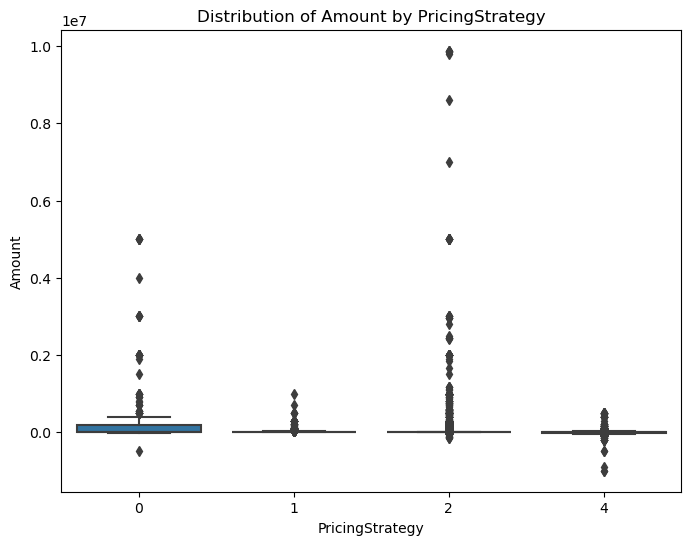

Correlation Coefficient:  -0.061930792420875715


In [23]:
# Select the numerical columns
numerical_columns = ['Amount', 'PricingStrategy']

# Calculate the correlation coefficient
correlation_coefficient = df[numerical_columns].corr().iloc[0, 1]

# Select the numerical feature and categorical feature
numerical_feature = 'Amount'
categorical_feature = 'PricingStrategy'

# Create a box plot
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x=categorical_feature, y=numerical_feature)
plt.xlabel(categorical_feature)
plt.ylabel(numerical_feature)
plt.title('Distribution of ' + numerical_feature + ' by ' + categorical_feature)
plt.show()

# Print the correlation coefficient
print("Correlation Coefficient: ", correlation_coefficient)

correlation coefficient of 0.5573700909352298 between the 'Amount' and 'FraudResult' features, there is a moderate positive relationship between these two variables. This indicates that higher transaction amounts are more likely to be associated with fraudulent transactions

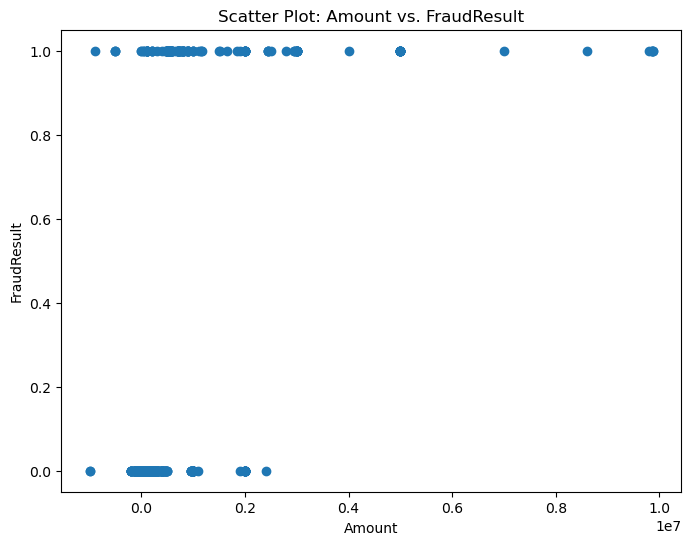

Correlation Coefficient:  0.5573700909352298


In [25]:
# Select the numerical columns
numerical_columns = ['Amount', 'FraudResult']

# Calculate the correlation coefficient
correlation_coefficient = df[numerical_columns].corr().iloc[0, 1]
# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(df['Amount'], df['FraudResult'])
plt.xlabel('Amount')
plt.ylabel('FraudResult')
plt.title('Scatter Plot: Amount vs. FraudResult')
plt.show()
# Print the correlation coefficient
print("Correlation Coefficient: ", correlation_coefficient)

Identifying Missing Values
we didn't see any missing so go to next steps

In [26]:
# Identify missing values
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

Missing Values:
 TransactionId           0
BatchId                 0
AccountId               0
SubscriptionId          0
CustomerId              0
CurrencyCode            0
CountryCode             0
ProviderId              0
ProductId               0
ProductCategory         0
ChannelId               0
Amount                  0
Value                   0
TransactionStartTime    0
PricingStrategy         0
FraudResult             0
dtype: int64


Outlier Detection


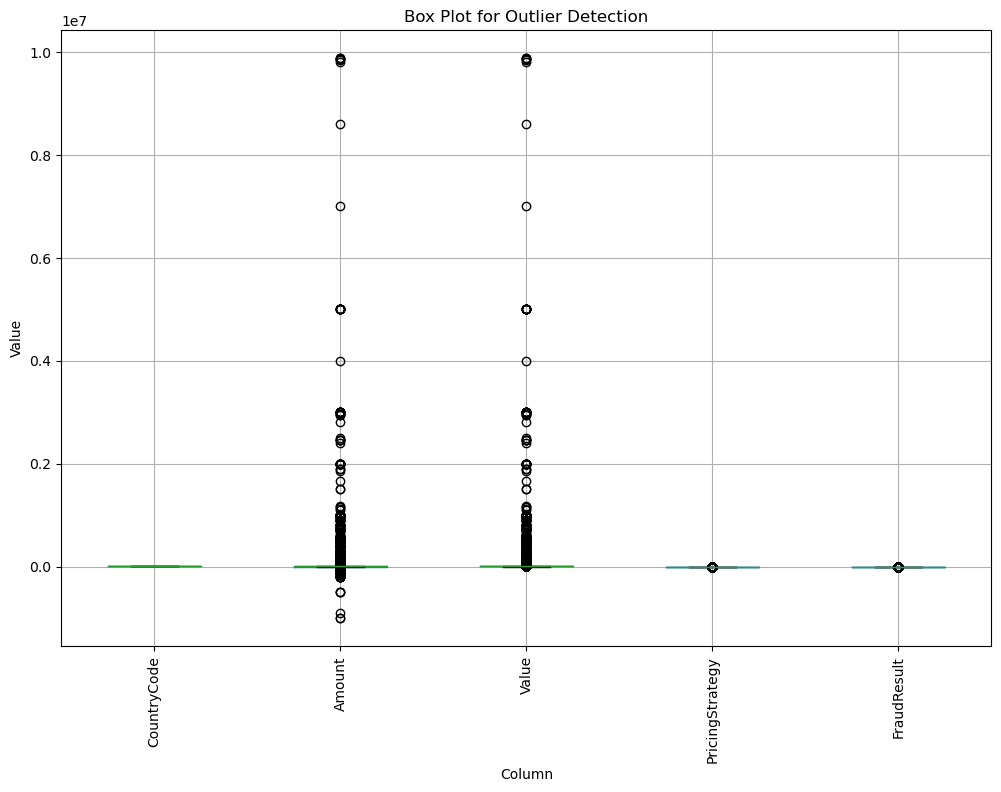

In [27]:
# Specify the columns for outlier detection
columns = ['CurrencyCode', 'CountryCode', 'ProviderId', 'ProductId', 'ProductCategory', 'ChannelId', 'Amount', 'Value', 'TransactionStartTime', 'PricingStrategy', 'FraudResult']

# Create box plots for each column
plt.figure(figsize=(12, 8))
df[columns].boxplot()
plt.title("Box Plot for Outlier Detection")
plt.xlabel("Column")
plt.ylabel("Value")
plt.xticks(rotation=90)
plt.show()